In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:/Users/91844/Documents/netflix_data.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# handling null values

In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
print(data["duration"].isnull().sum())

3


In [6]:
data[data['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [7]:
data = data.dropna(subset=['duration'])


In [8]:
print(data["duration"].isnull().sum())

0


In [9]:
data.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
data = data.dropna(subset=['rating'])
data = data.dropna(subset=['date_added'])

In [11]:
data.isnull().sum()


show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data['rating']

7       TV-MA
8       TV-14
9       PG-13
12      TV-MA
24      TV-14
        ...  
8801    TV-MA
8802        R
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 5332, dtype: object

data preprocessing

In [14]:
data['date_added']=pd.to_datetime(data['date_added'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 541.5+ KB


In [16]:
cols = ['show_id','description']
data.drop(cols , axis = 1 , inplace = True)

In [17]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies"
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [18]:
rating_map = {
    'TV-Y': 'For Kids', 'TV-Y7': 'For Kids', 'G': 'For Kids',
    'PG': 'Teens', 'PG-13': 'Teens', 'TV-G': 'Teens',
    'TV-PG': 'Teens', 'TV-14': 'Teens', 'R': 'Adults',
    'NC-17': 'Adults', 'TV-MA': 'Adults'
}

# Use the map to create a new 'category' column
data['rating_category'] = data['rating'].map(rating_map).fillna('Other')

# Check the new category distribution
print(data['rating_category'].value_counts())

Adults      2602
Teens       2474
For Kids     192
Other         64
Name: rating_category, dtype: int64


In [19]:
data.head(15)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,rating_category
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Adults
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",Teens
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Teens
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",Adults
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",Teens
27,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Teens
28,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",Teens
29,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,Teens
38,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",Teens
41,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",Teens


In [20]:
data['director']

7              Haile Gerima
8           Andy Devonshire
9            Theodore Melfi
12      Christian Schwochow
24               S. Shankar
               ...         
8801        Majid Al Ansari
8802          David Fincher
8804        Ruben Fleischer
8805           Peter Hewitt
8806            Mozez Singh
Name: director, Length: 5332, dtype: object

# handling column with multiple values

In [21]:
#listed in 
genre_list=[]
for genre in data['listed_in']:
    for gen in genre.split(', '):
        genre_list.append(gen.strip())
genre_count = pd.Series(genre_list).value_counts()
print(genre_count.head(5))

International Movies    2369
Dramas                  2293
Comedies                1553
Action & Adventure       806
Independent Movies       740
dtype: int64


In [22]:
#cast
cast_=[]
for cast_name in data['cast']:
    for cast_names in cast_name.split(', '):
        cast_.append(cast_names.strip())
cast_count = pd.Series(cast_).value_counts()
print(cast_count.head(5))

Anupam Kher         42
Shah Rukh Khan      34
Naseeruddin Shah    31
Akshay Kumar        30
Om Puri             30
dtype: int64


In [23]:
#country
country_list=[]
for coun in data['country']:
    for count in coun.split(', '):
        country_list.append(count.strip())
country_count= pd.Series(country_list).value_counts()
print(country_count.head(5))

United States     2485
India              940
United Kingdom     484
Canada             295
France             293
dtype: int64


In [24]:
data['release_year'].value_counts().head(5)

2017    657
2018    648
2016    577
2019    519
2020    442
Name: release_year, dtype: int64

# Data visualisation


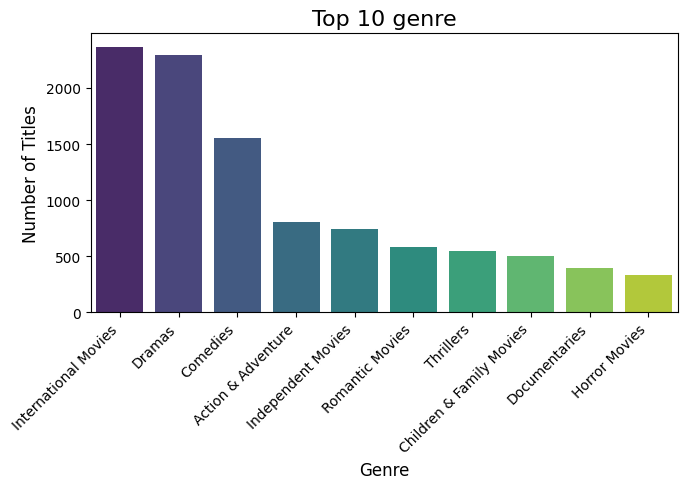

In [25]:
# TOP 10 GENRE
top_10_genre = genre_count.head(10)
plt.figure(figsize=(7,5))
sns.barplot(x=top_10_genre.index , y=top_10_genre.values , palette='viridis')
plt.title('Top 10 genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

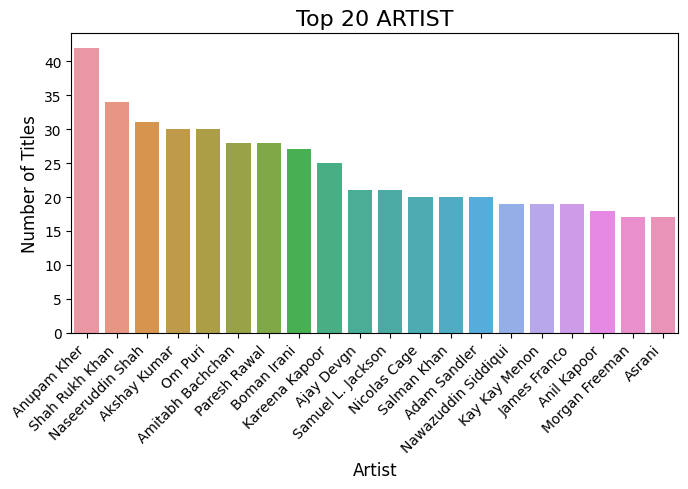

In [26]:
# TOP 10 ARTIST
top_10_ARTIST = cast_count.head(20)
plt.figure(figsize=(7,5))
sns.barplot(x=top_10_ARTIST.index , y=top_10_ARTIST.values)
plt.title('Top 20 ARTIST', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjusts plot to ensure labels don't get cut off
plt.show()

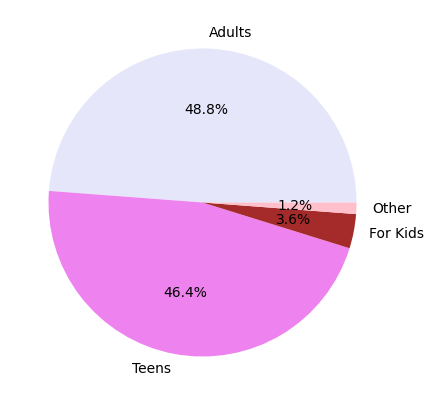

In [27]:
# COMPARING CONTENT FOR DIFFERENT AGE GROUP
rating_count = data['rating_category'].value_counts()
plt.figure(figsize=(5,5))

plt.pie(rating_count,
        labels=rating_count.index,
        autopct='%1.1f%%',
        
        colors=['lavender','violet','brown','pink'] 
       )

#sns.barplot(x = rating_count.values , y = rating_count.index )
#plt.title('COMPARING CONTENT FOR DIFFERENT AGE GROUP')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

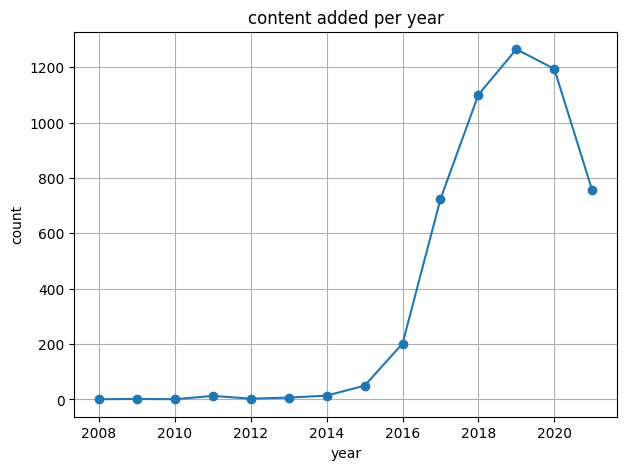

In [28]:
#content added per year
data['year_added'] = data['date_added'].dt.year.astype(int)
title_per_year = data.groupby('year_added').size().reset_index(name='count')
plt.figure(figsize=(7,5))
plt.plot(title_per_year['year_added'] , title_per_year['count'], marker='o' , linestyle='-')
plt.title('content added per year')
plt.xlabel('year')
plt.ylabel('count')
plt.grid(True)
plt.show

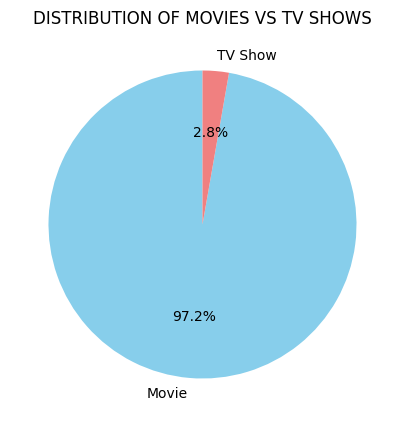

In [29]:
#DISTRIBUTION OF MOVIES VS TV SHOWS
type_count = data['type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(type_count,
        labels=type_count.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'lightcoral'] 
       )
plt.title('DISTRIBUTION OF MOVIES VS TV SHOWS')
plt.show()